# TS5 - Estimación espectral: Ancho de banda de señales reales

### Autoras: Catalina Gonzalez Araujo y Lola Pampin
## Docentes: Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit

12/10/2025

# I. **Introducción**
## Métodos de estimación espectral

En la práctica, el cálculo de la densidad espectral de potencia (PSD) es restringido, debido a que se cuenta con una cantidad de muestras y realizaciones limitadas del proceso aleatorio y generalmente se desconoce la función de probabilidad. Por ello, se utilizan diversos métodos de estimación espectral, que se detallan a continuación.

### Periodograma

Se define a x[n] como un proceso aleatorio de longitud infinita, con media 0 y WSS (wide-sense stationary), cuya autocorrelación $r_{xx}[l]$ es absolutamente sumable.
$$
\sum_{l=-\infty}^{\infty} |r_{xx}[l]| < \infty
$$

La densidad espectral de potencia (PDS) de x[n], $S_{xx}(\omega)$, se define mediante la DTFT de la función de autocorrelación.

$$
S_{xx}(\omega) \triangleq \mathcal{F}\{r_{xx}[l]\} = \sum_{l=-\infty}^{\infty} r_{xx}[l]e^{-j\omega l} \tag{14.6}
$$
El periodograma es un estimador de la densidad espectral de potencia basado en N mediciones sampleadas de x[n]. Se define mediante la siguiente ecuación:

$$
\hat{S}_{xx}(\omega,N)= \frac{1}{N} \mathcal{F}\{x[n]\} \cdot \mathcal{F}\{x[n-L]\} = \frac{1}{N} X_N(\omega) X_N^*(\omega) = \frac{1}{N} |X_N(\omega)|^2
$$

$$
= \left| \frac{1}{N} \sum_{n=0}^{N-1} x[n]e^{-j\omega n} \right|^2 \tag{14.15}
$$

Es un estimador con una alta varianza, por lo que se usan variantes mejoradas. 

### Método de Bartlet

El objetivo del método de Bartlett es hallar un estimador insesgado y consistente. Se fundamenta en la idea de que si se promedian M mediciones incorreladas de una variable aleatoria para formar la media muestral, la varianza de esta media disminuye en proporción a M.

Prácticamente, este método divide a la señal en bloques no solapados, calcula el espectro de cada uno y luego promedia los resultados. Reduce la varianza de la estimación a costa de una menor resolución espectral. Si se mejora la varianza k veces, se empeora la resolución espectral k veces. 

Su definición matemática es:

$$ P_B(\omega, L, M) \triangleq \frac{1}{M} \sum_{m=0}^{M-1} \left( \frac{1}{L} \sum_{n=0}^{N-1} x[n + mL] e^{-j\omega n} \right)^2  = \frac{1}{N} \sum_{m=0}^{M-1} \left( \sum_{n=0}^{N-1} x[n + mL] e^{-j\omega n}  \right)^2 $$ 

El valor esperado del periodograma promediado $P_B(ω;L;M)$ es el mismo que el del periodograma de un solo bloque (también es asintóticamente insesgado cuando L tiende a $\infty$)

$$
E (P_B(ω;L;M)) = E(\hat S_{xx} (ω;L))
$$

Si cada bloque es incorrelado y de igual varianza, entonces la varianza de la suma de M periodogramas es 1/M veces la varianza del periodograma de un bloque. Es decir, la varianza del estimador tiende a cero cuando M tiende a $\infty$

$$
var(P_B(ω;L;M))= \frac {1}{M}var(\hat S_{xx}(ω;L))
$$

### Método de Welch

Es equivalente a hacer el periodograma modificado promediado, pero se divide la secuencia de datos x[n] en M tramos de longitud L que se solapan en D puntos. En cada tramo, los datos se multiplican por una ventana y se calculan y promedian los periodogramas para formar el de Welch. Es decir, se basa en el método de Bartlett, pero los bloques se encuentran solapados y agrega ventaneo. Busca concentrar mejor la energía y evitar el desparramo espectral. Su definición matemática es:

$$ P_W(\omega, L, D, M) =  \frac{     \frac{1}{M} \sum_{m=0}^{M-1}      \left( \sum_{n=0}^{L-1} x[n + mD] w_L[n] e^{-j\omega n} \right)^2 }{     \sum_{n=0}^{L-1} w_L^2[n] } $$

Este método logra un estimador insesgado y consistente para la PDS, ya que combina el periodograma, el método de Bartlett y el periodograma modificado.


### Método de Blackman-Tukey

Estima la autocorrelación, la multiplica por una ventana para truncar retardos y calcula la FFT de la autocorrelación truncada. A continuación se detalla el procedimiento:

A partir de $N$ muestras de la señal $x[n]$, se calcula la autocorrelación estimada.
$$ 
\hat{R}_{xx}[k] = \frac{1}{N} \sum_{n=0}^{N - |k| - 1} x[n] \cdot x[n - |k|], \quad \text{con } -(N - 1) \leq k \leq N - 1 
$$

Se obtiene una función discreta y finita. Para evitar problemas al estimar la autocorrelación hasta retardos muy grandes (donde la estimación es ruidosa), se multiplica por una ventana simétrica $w[k]$ de longitud $M$:

$$
R_{xx}[k]=w[k] \hat R_{xx}[k]
$$

Esto reduce la varianza, pero introduce sesgo (se pierde información de retardos grandes).


Se calcula la transformada discreta de Fourier (DFT) de la autocorrelación truncada:

$$
\hat{S}_{xx}(f) = \sum_{k=-M}^{M} R_{xx}[k] \, e^{-j 2\pi f k} 
$$

Al truncar la autocorrelación, se suaviza el espectro, es decir, menos varianza en el estimador, pero menos resolución. La forma de la ventana controla el compromiso entre resolución espectral y reducción de ruido. Es decir, este método es un promediado espectral pero hecho en el dominio del tiempo antes de pasar a frecuencia.

## Tipos de señales

En este trabajo se analizaron tres tipos de señales:

- Electrocardiograma (ECG): refleja la actividad del corazón.

- Pletismografía (PPG): mide variaciones de volumen sanguíneo.

- Señales de audio: comprenden tanto voz como silbidos, y se caracterizan por un espectro más amplio.

El objetivo principal es estimar la densidad espectral de potencia de cada señal, utilizando alguno de los métodos mencionados y, a partir de dicha estimación, determinar su ancho de banda efectivo. Esto permitirá comparar cuantitativamente las características espectrales de las distintas señales analizadas.

## Ancho de banda

El ancho de banda de una señal se define como el rango de frecuencias dentro del cual se concentra la mayor parte de su energía o potencia espectral.

Puede definirse de distintas maneras según el criterio adoptado:

- Ancho de banda de potencias (en dB): Es el intervalo de frecuencias comprendido entre los puntos en los que la densidad espectral de potencia (PSD) cae a la mitad de su valor máximo (-3 dB respecto del máximo).

- Ancho de banda efectivo o de energía: Es el rango de frecuencias que contiene un porcentaje determinado de la energía total de la señal (entre el 95% y el 99%), considerando que el resto se asocia a otras fuentes de interferencia o ruido.

En ambos casos, el ancho de banda describe la porción significativa del espectro donde la señal tiene contenido útil para su análisis, y fuera de ese rango las contribuciones en frecuencia pueden considerarse despreciables.

# II. **Desarrollo**

En primer lugar, se sintetizaron las señales y se realizaron los respectivos gráficos.

In [11]:
# %% Imports
import numpy as np
from scipy import signal as sig
from scipy.signal import periodogram , get_window
from numpy.fft import fft
import matplotlib.pyplot as plt  
import scipy.io as sio
from scipy.io.wavfile import write


Text(0.5, 1.0, 'ECG sin ruido')

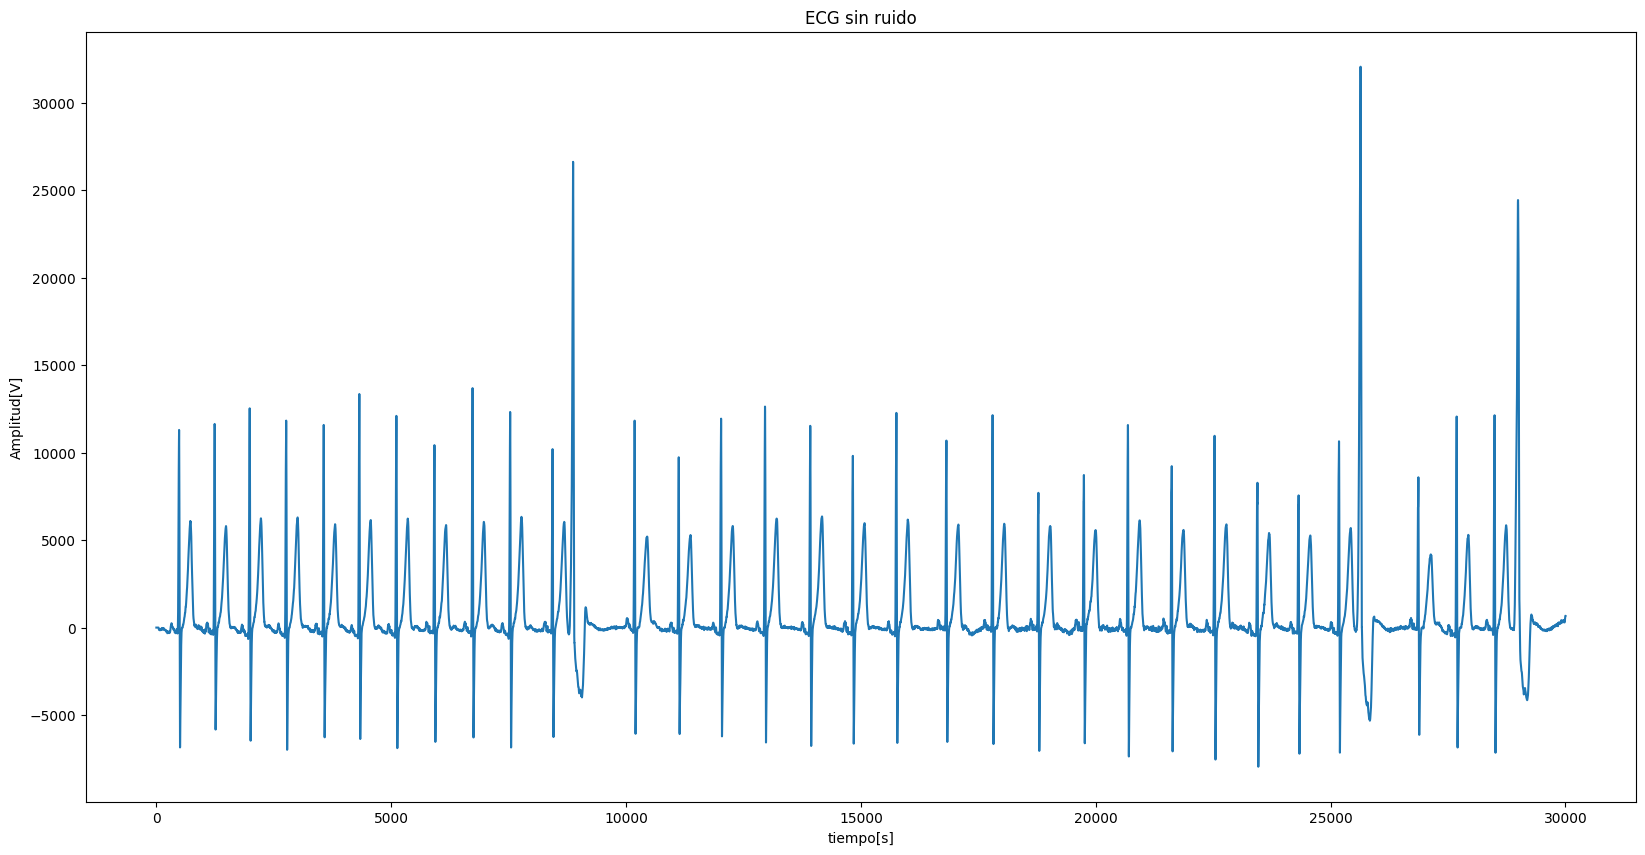

In [12]:
##################
# Lectura de ECG #
##################

fs_ecg = 1000 # Hz


ecg_one_lead = np.load('ecg_sin_ruido.npy')

plt.figure(figsize=(20,10))
plt.xlabel('tiempo[s]')
plt.ylabel('Amplitud[V]')
plt.plot(ecg_one_lead)
plt.title('ECG sin ruido')



Text(0.5, 1.0, 'PPG sin ruido')

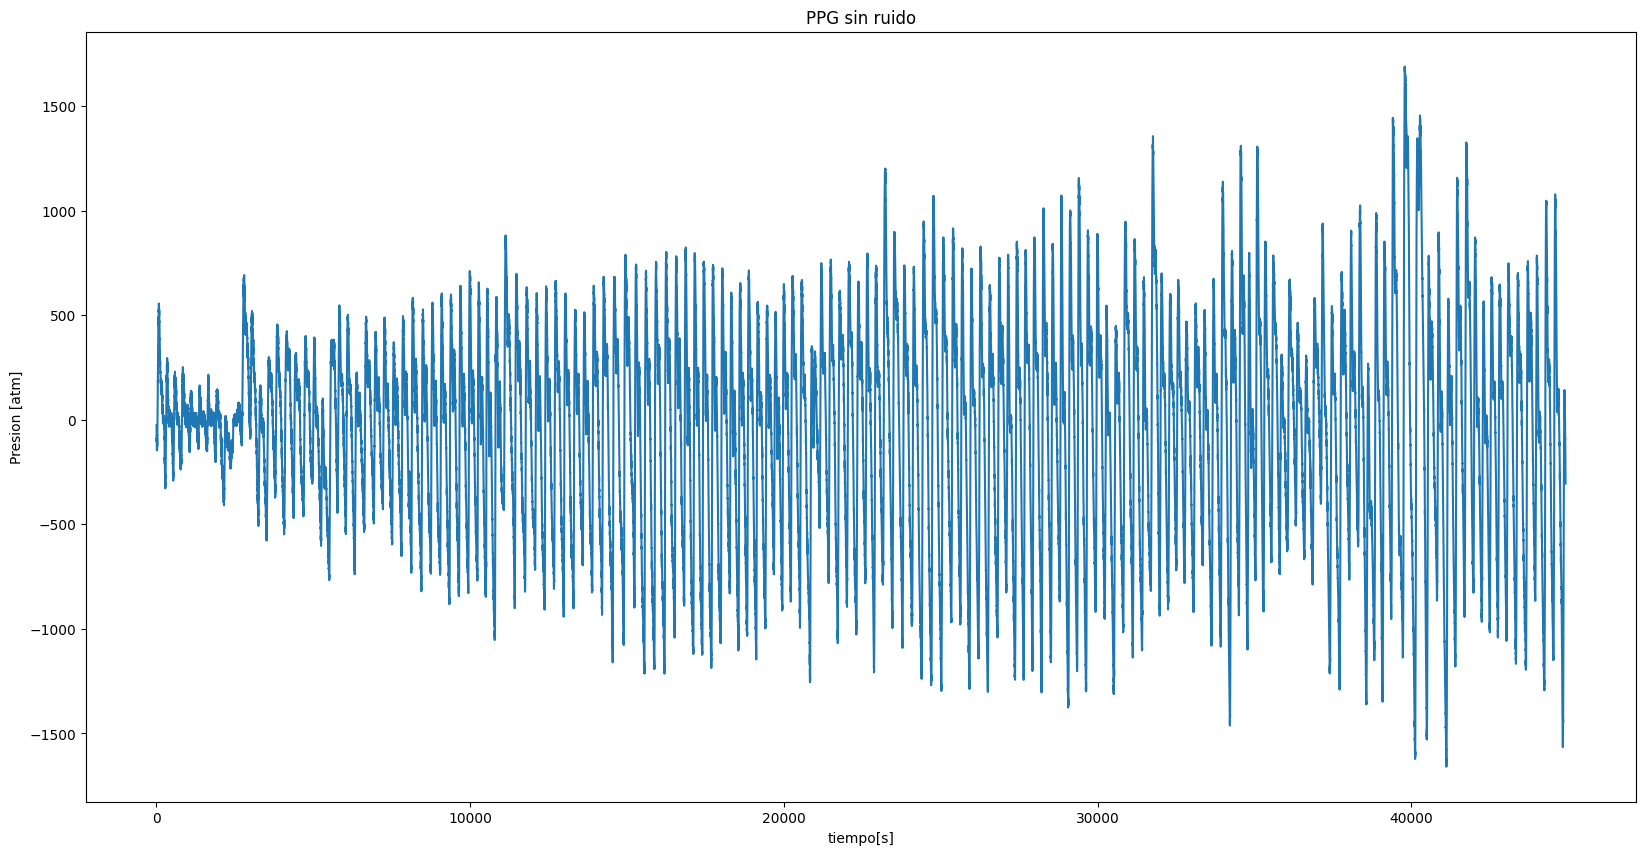

In [13]:
#%%

####################################
# Lectura de pletismografía (PPG)  #
#senal proporcional a la cant de oxigeno que tenes en sangre en el tejido capilar
####################################

fs_ppg = 400 # Hz
##################
## PPG sin ruido
##################

ppg = np.load('ppg_sin_ruido.npy')

plt.figure(figsize=(20,10))
plt.xlabel('tiempo[s]')
plt.ylabel('Presion [atm]')
plt.plot(ppg)
plt.title('PPG sin ruido')


Text(0.5, 1.0, 'La cucaracha')

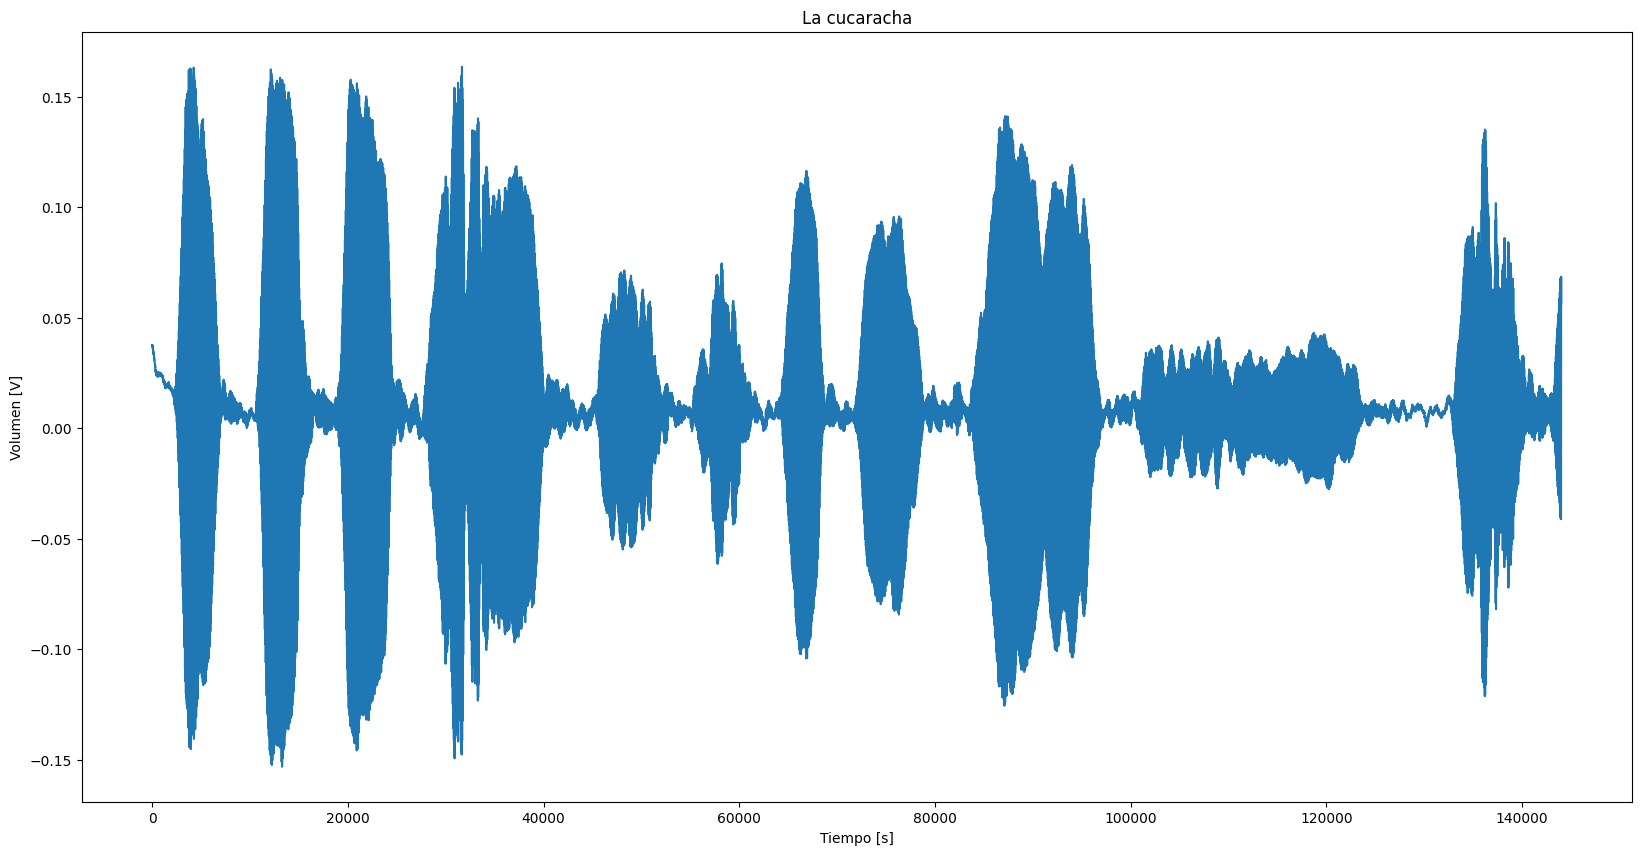

In [14]:
#%%

####################
# Lectura de audio #
####################

# Cargar el archivo CSV como un array de NumPy
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
# fs_audio, wav_data = sio.wavfile.read('prueba psd.wav')
# fs_audio, wav_data = sio.wavfile.read('silbido.wav')

plt.figure(figsize=(20,10))
plt.title('Audio')
plt.xlabel('Tiempo [s]')
plt.ylabel('Volumen [V]')
plt.plot(wav_data)
plt.title('La cucaracha')

Una vez sintetizadas las señales, se busca realizar la estimación de la densidad espectral de potencia (PSD) de cada señal mediante distintos métodos. Se estimó el ECG mediante el periodograma ventaneado, el PPG mediante Welch y el audio mediante Blackman-Tukey.

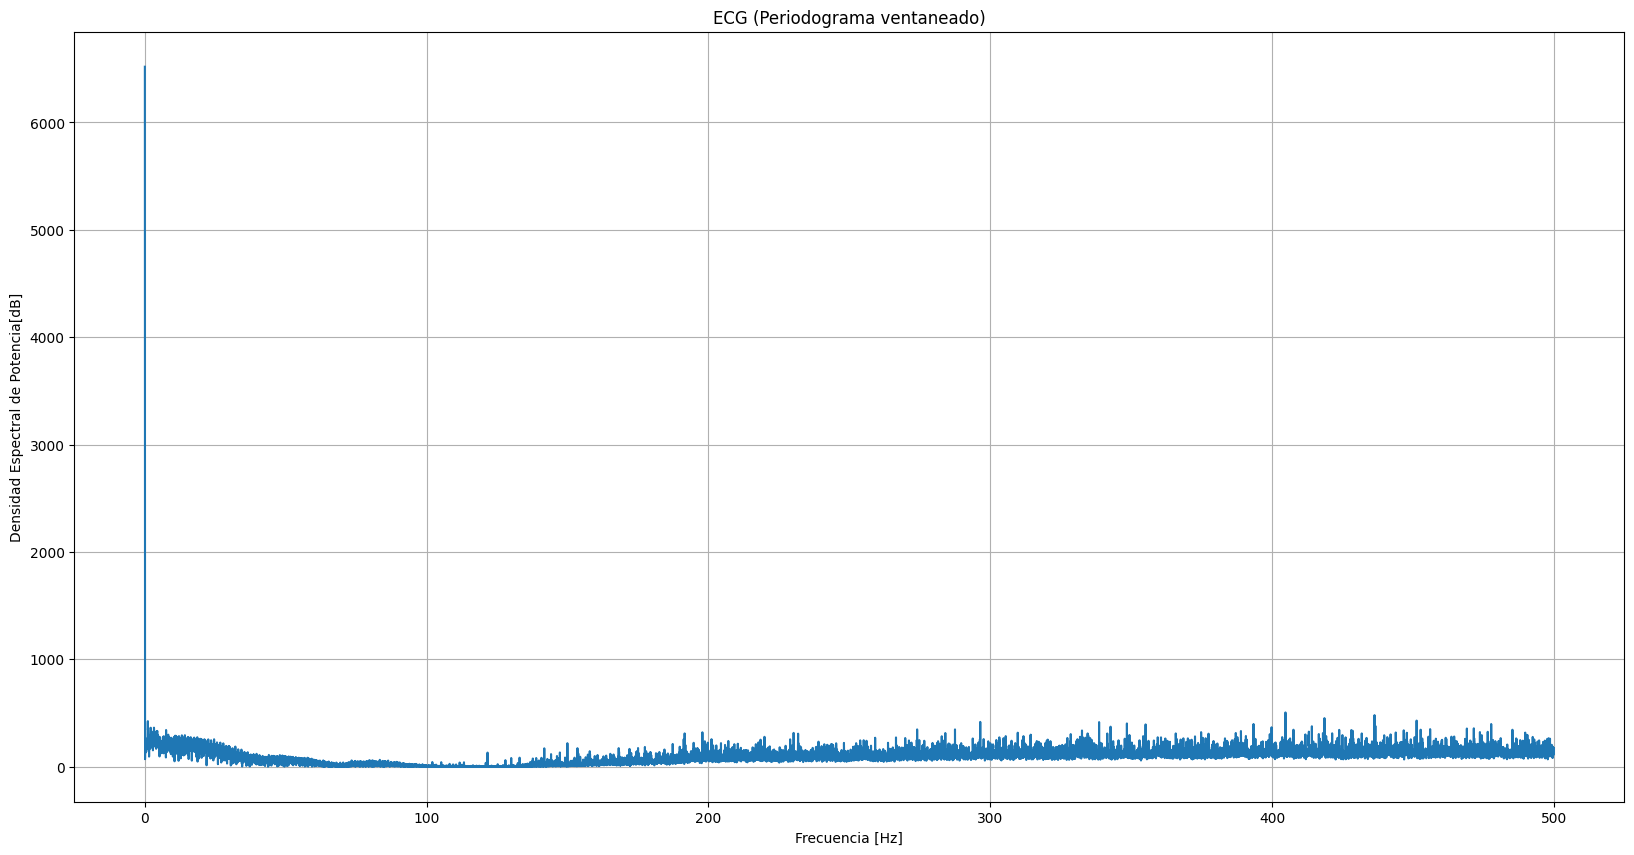

In [15]:
# ECG POR PERIODOGRAMA VENTANEADO

win_ecg = get_window('hann', len(ecg_one_lead))
ecg_ventaneado=ecg_one_lead*win_ecg

f_ecg, Pxx_ecg = periodogram(ecg_ventaneado, fs_ecg)

plt.figure(figsize=(20,10))
plt.plot(f_ecg,10*np.log10(Pxx_ecg)**2)
plt.title("ECG (Periodograma ventaneado)")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad Espectral de Potencia[dB]')
plt.grid(True)
plt.show()

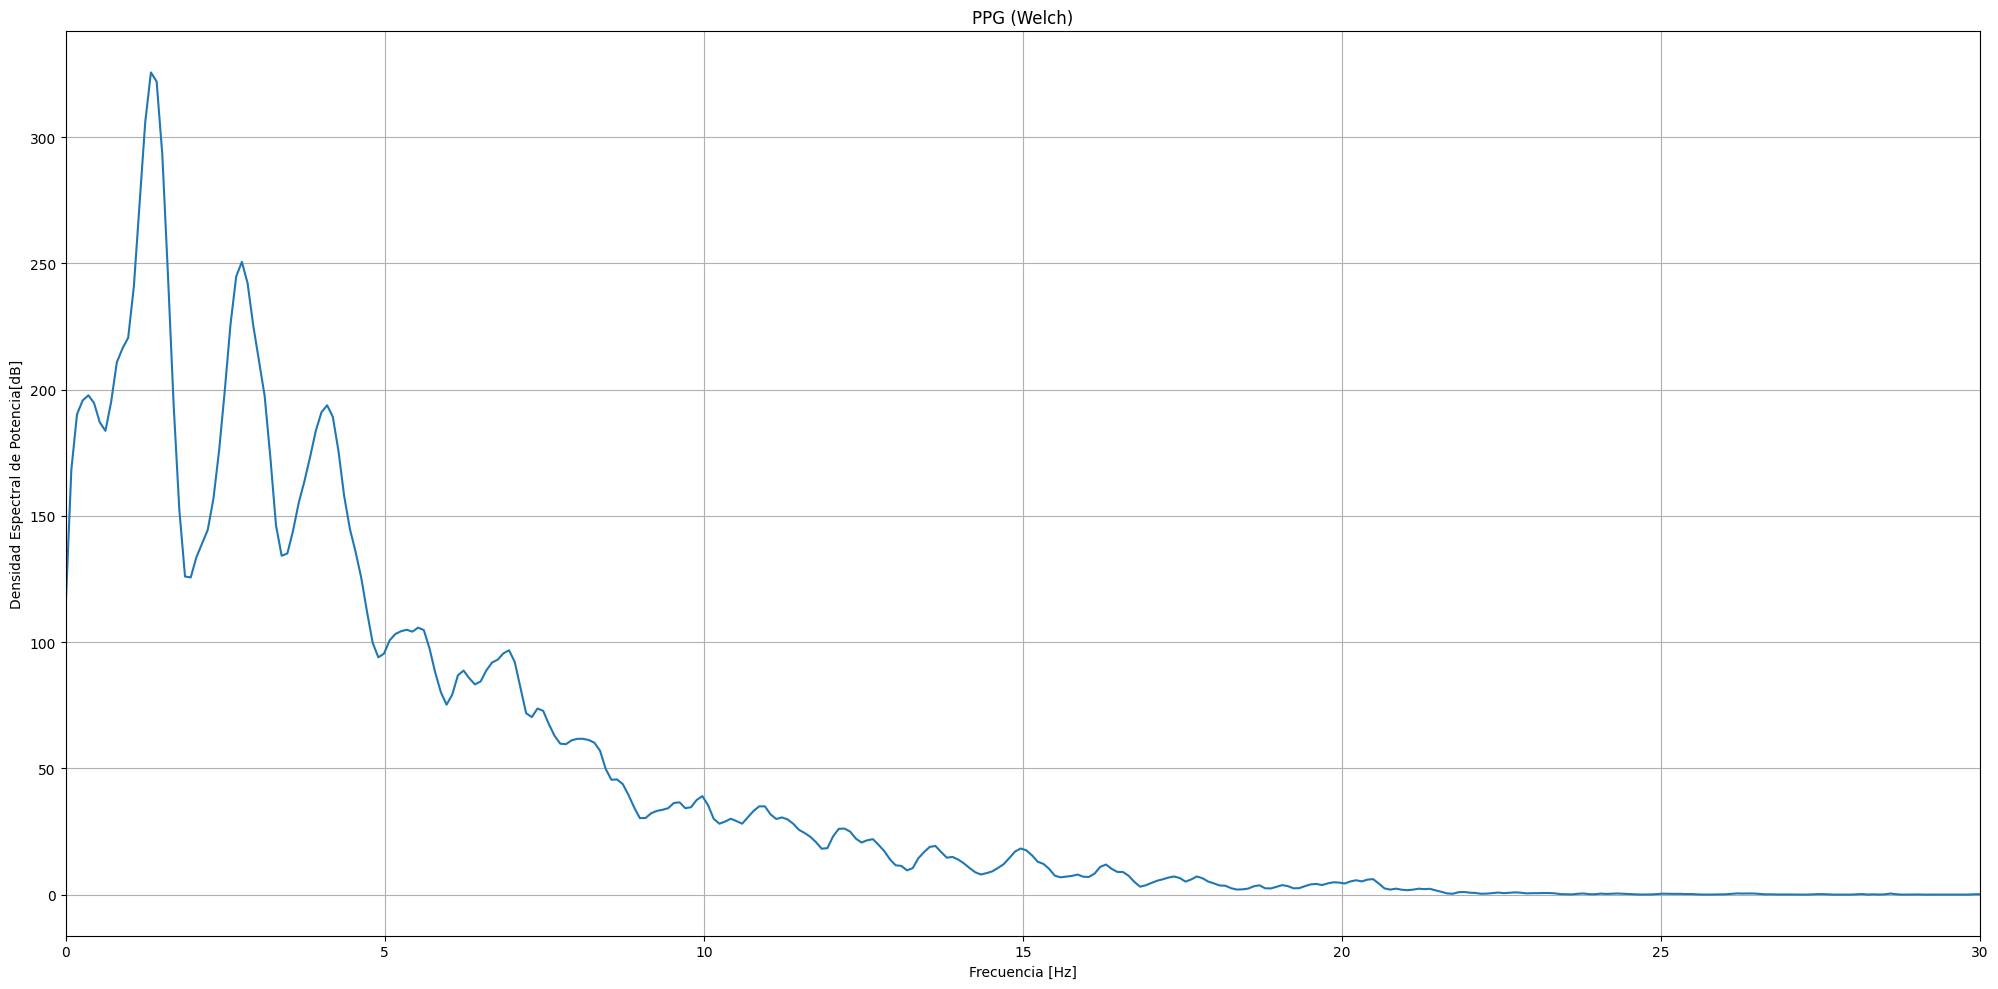

In [16]:
# PPG por welch

#PARAMETROS WELCH
cant_promedios_ppg = 20 #cantidad de segmentos ==> mientras mas chico mas varianza
nperseg_ppg = len(ppg) // cant_promedios_ppg #tamanio de cada segmento
nfft_ppg = 2 * nperseg_ppg #numero de puntas para la FFT 
win_ppg = "hamming" 

f_ppg, Pxx_ppg = sig.welch(ppg, fs=fs_ppg, window = win_ppg, nperseg=nperseg_ppg, nfft=nfft_ppg)

#sig.welch:
#    - Divide la señal en segmentos (con posible solapamiento, si se especifica).
#   - Aplica la ventana a cada segmento.
#    - Calcula la FFT de cada segmento.
#   - Promedia los espectros de potencia de todos los segmentos.

#Gráfico 
plt.figure(figsize=(20,10))
plt.plot(f_ppg, 10*np.log10(Pxx_ppg)**2)
plt.title("PPG (Welch)")
plt.ylabel('Densidad Espectral de Potencia[dB]')
plt.xlabel("Frecuencia [Hz]")
plt.grid(True)
plt.tight_layout()
plt.xlim([0, 30]) #como es pasabajos, limito
plt.show()

Text(0.5, 1.0, 'Audio (Blackman-Tukey)')

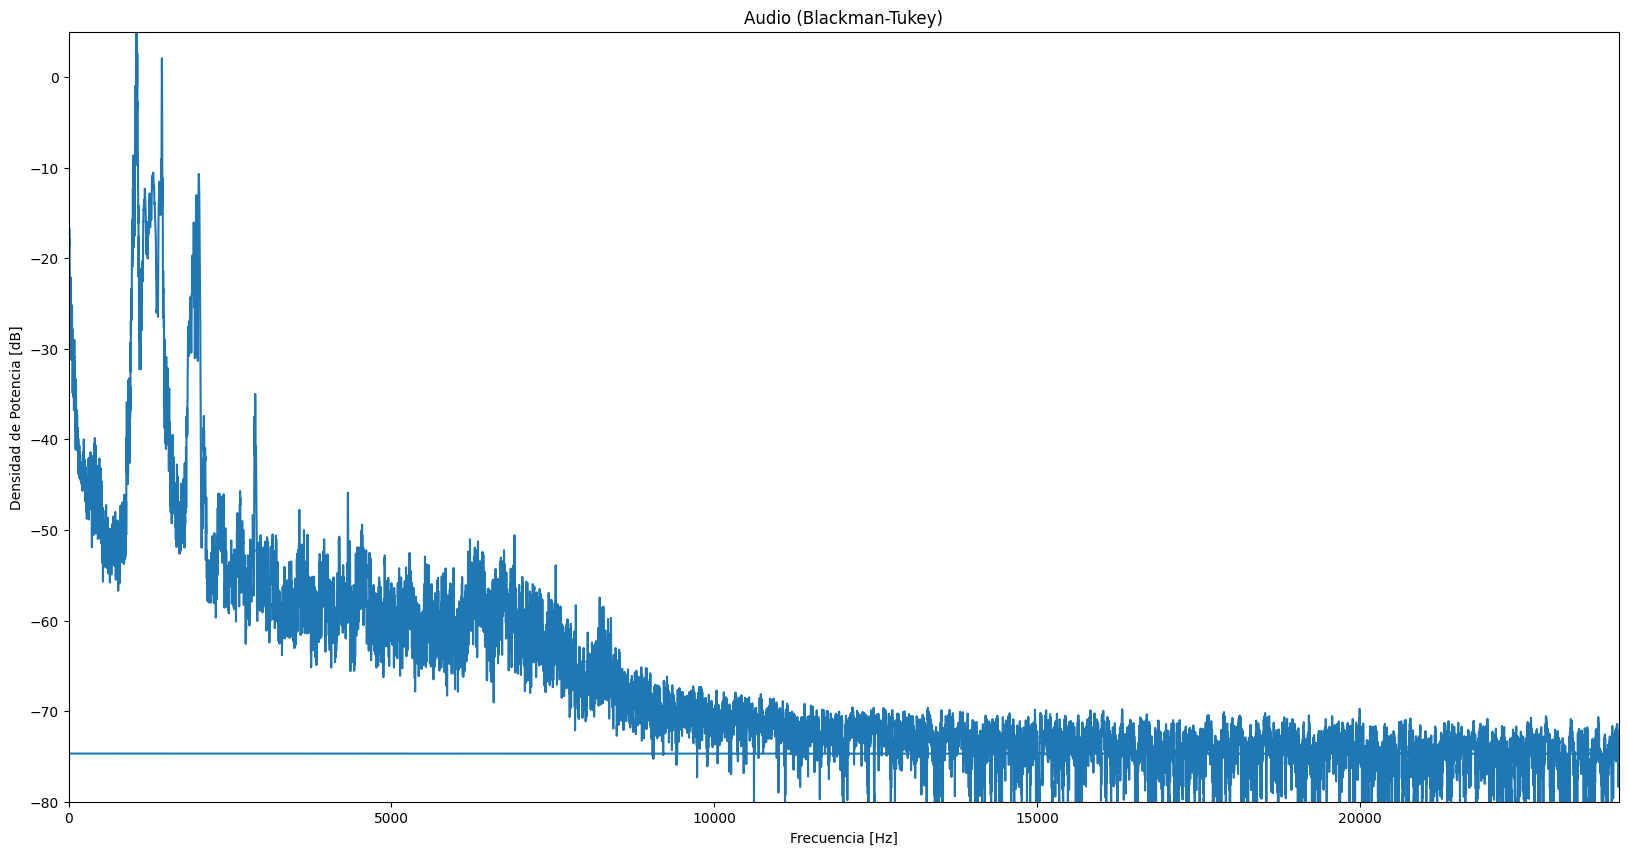

In [17]:
def blackman_tukey(x,  M = None):    
    
    N = len(x)

    if M is None:
        M = N//5
    
    r_len = 2*M-1

    # hay que aplanar los arrays por np.correlate.
    # usaremos el modo same que simplifica el tratamiento de la autocorr
    #xx = x.ravel()[:r_len]; #ravel --> convierte una matriz multidimensional en un array de 1D
    
    x = np.asarray(x)  # Asegura que x sea un array
    xx = x[:r_len]     # No es necesario ravel si x es 1D
    r = np.correlate(xx, xx, mode='same') / r_len
    window = sig.windows.blackman(r_len)
    r_windowed = r * window
    Px = np.abs(np.fft.fft(r_windowed, n=N))
    #Px = Px.reshape(x_z)
    return Px;


Pxx_audio=blackman_tukey(wav_data, len(wav_data)//5 )
f_audio = np.fft.fftfreq(len(wav_data), d=1/fs_audio)

Pxx_audio_db = 10 * np.log10(Pxx_audio + 1e-12)  # evitar log(0)
freqs = np.fft.fftfreq(len(wav_data), d=1/fs_audio)
half = len(wav_data) // 2
freqs_pos = freqs[:half]
plt.figure(figsize=(20,10))
plt.plot(freqs, Pxx_audio_db)
plt.xlim([0, max(freqs)])
plt.ylim((-80, 5))
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad de Potencia [dB]")
plt.title("Audio (Blackman-Tukey)")


En la segunda parte del trabajo, se buscó estimar el ancho de banda de cada una de las señales utilizadas.

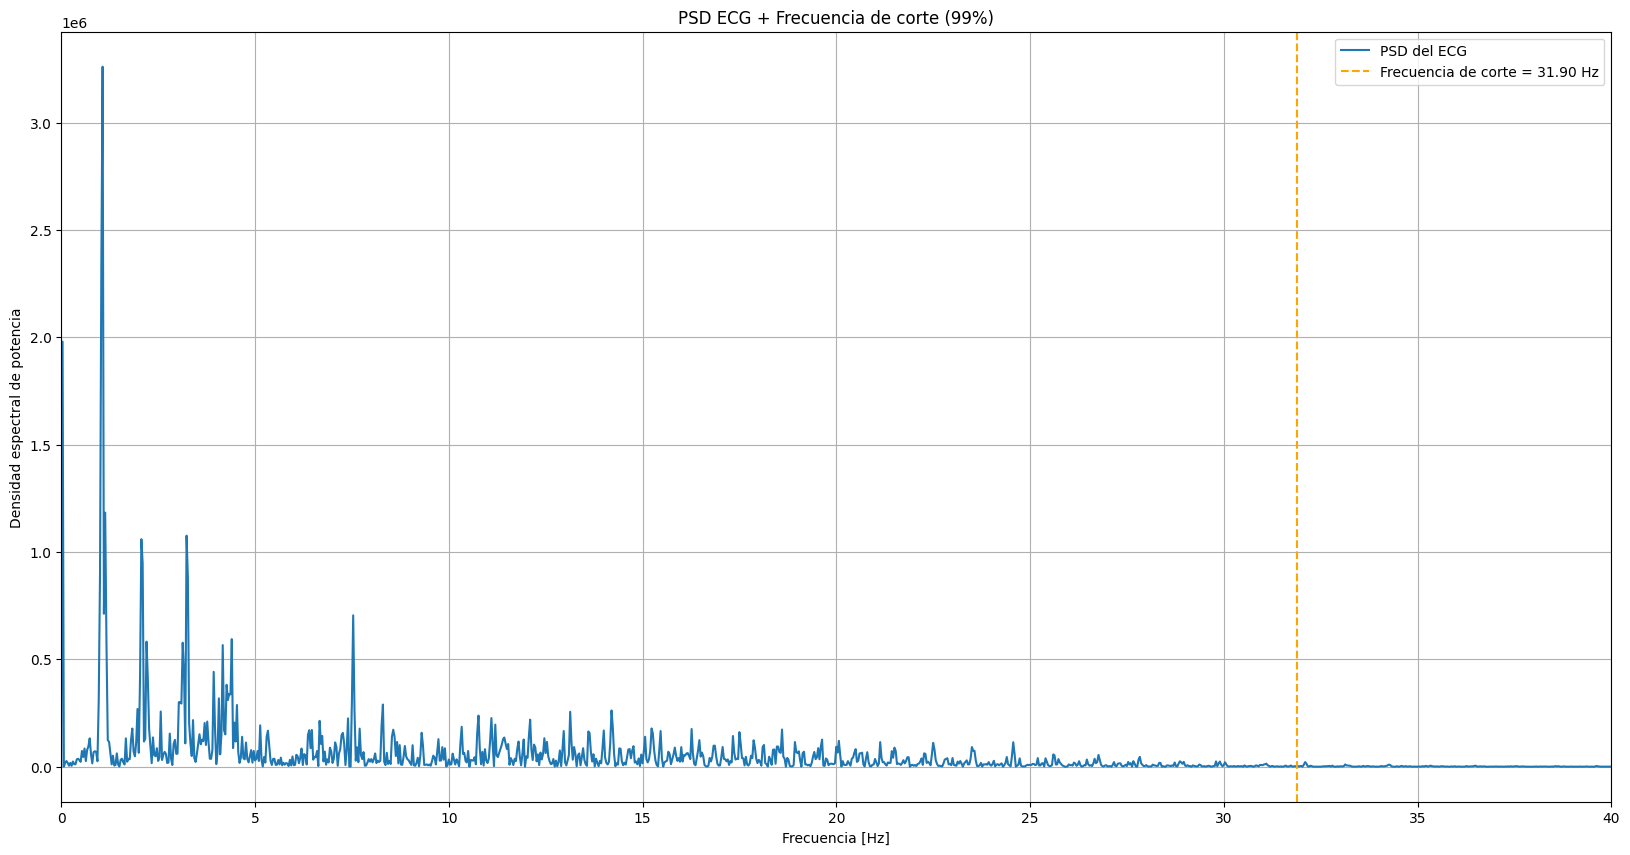

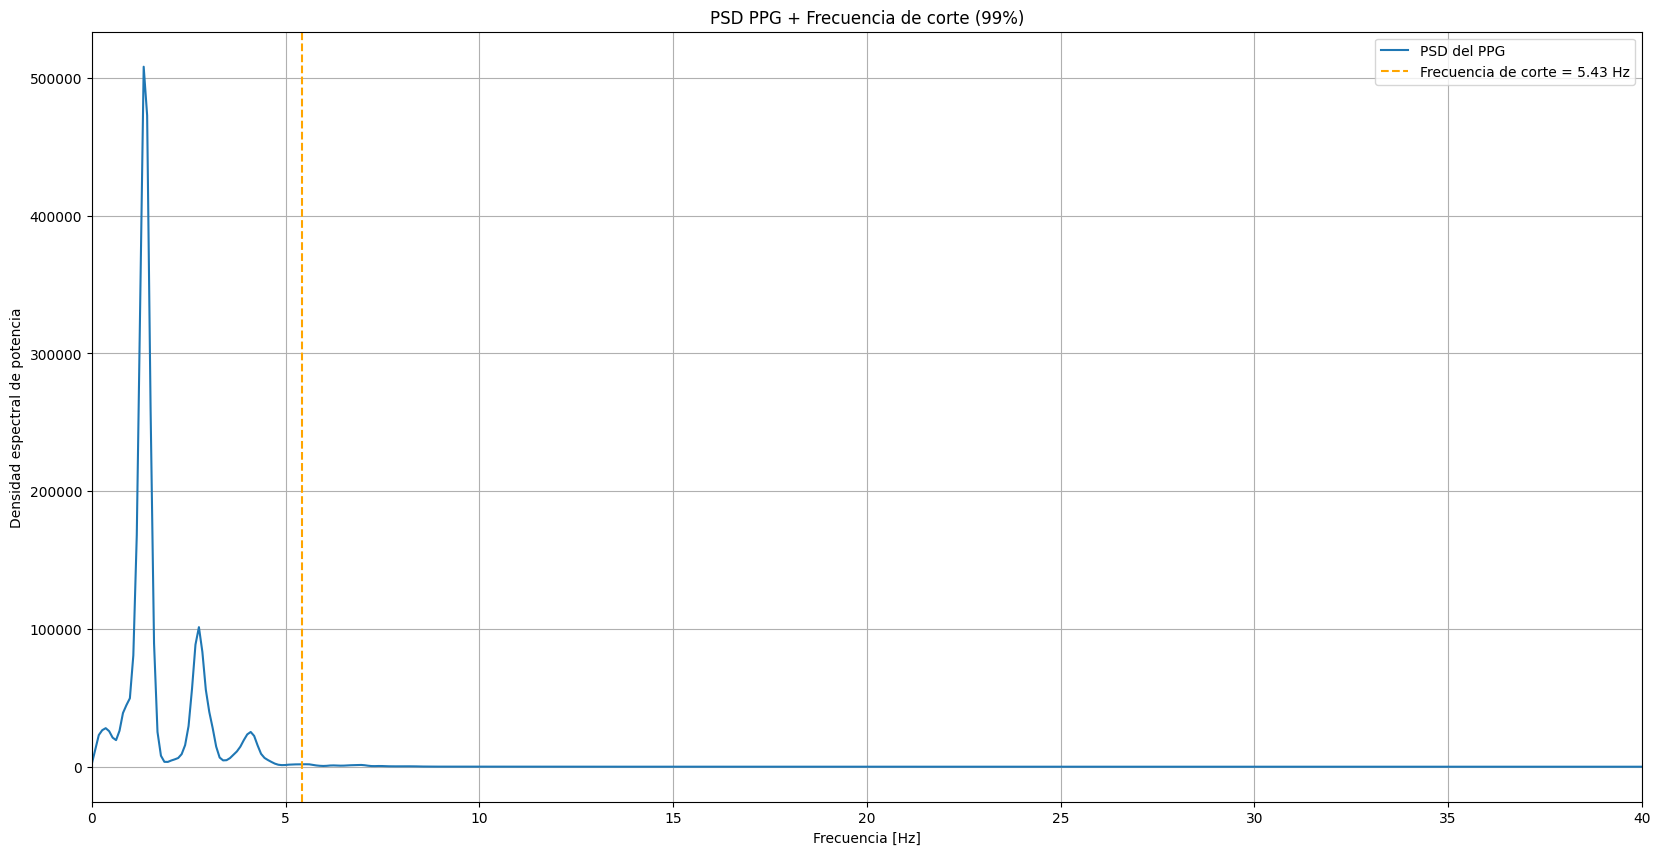

In [18]:
# %% Calculo de frecuencia de corte y ancho de banda
# Idea general:
# 1) Se calcula la energía acumulada normalizada de la PSD.
# 2) Se busca el índice donde la energía acumulada alcanza el 99% del total.
# 3) La frecuencia correspondiente a ese punto se define como la frecuencia de corte (fc).

# Todas las señales utilizadas (ECG, PPG y audio) son pasabajo o limitadas en frecuencia,
# es decir que concentran la mayor parte de su energía en las bajas frecuencias y su contenido en altas frecuencias disminuye.
# Por lo tanto, el ancho de banda efectivo (BW) puede aproximarse mediante la frecuencia de corte obtenida: BW ≈ fc

# -------- ECG --------
df_ecg = f_ecg[1] - f_ecg[0]
energia_acum_ecg = np.cumsum(Pxx_ecg) * df_ecg
energia_acum_ecg_norm = energia_acum_ecg / energia_acum_ecg[-1]
indice_corte_ecg = np.where(energia_acum_ecg_norm >= 0.99)[0][0]
frecuencia_corte_ecg = f_ecg[indice_corte_ecg]

# Grafico
plt.figure(figsize=(20,10))
plt.plot(f_ecg, Pxx_ecg, label = 'PSD del ECG')
plt.axvline(frecuencia_corte_ecg, color='orange', linestyle='--', label=f'Frecuencia de corte = {frecuencia_corte_ecg:.2f} Hz')
plt.title("PSD ECG + Frecuencia de corte (99%)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad espectral de potencia")
plt.xlim(0, 40)
plt.legend()
plt.grid(True)
plt.show()

# -------- PPG --------
df_ppg = f_ppg[1] - f_ppg[0]
energia_acum_ppg = np.cumsum(Pxx_ppg) * df_ppg
energia_acum_ppg_norm = energia_acum_ppg / energia_acum_ppg[-1]
indice_corte_ppg = np.where(energia_acum_ppg_norm >= 0.99)[0][0]
frecuencia_corte_ppg = f_ppg[indice_corte_ppg]

# Grafico
plt.figure(figsize=(20,10))
plt.plot(f_ppg, Pxx_ppg, label = 'PSD del PPG')
plt.axvline(frecuencia_corte_ppg, color='orange', linestyle='--', label=f'Frecuencia de corte = {frecuencia_corte_ppg:.2f} Hz')
plt.title("PSD PPG + Frecuencia de corte (99%)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad espectral de potencia")
plt.xlim(0, 40)
plt.legend()
plt.grid(True)
plt.show()

A continuación se realizó una tabla para plasmar los resultados obtenidos. 

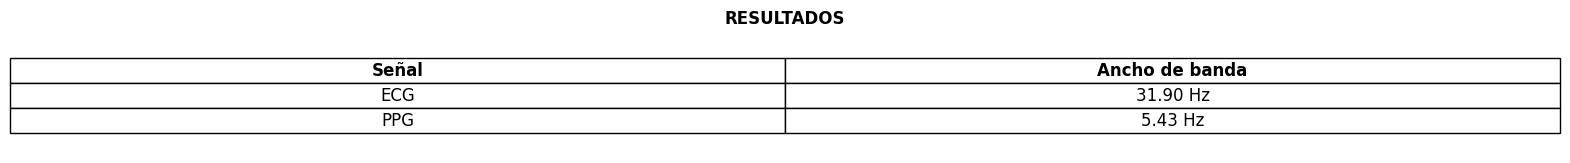

In [19]:
# %% Tabla con los resultados del ancho de banda
data = [
    ["ECG", f"{31.90:.2f} Hz"],
    ["PPG", f"{5.43:.2f} Hz"]
]

fig, ax = plt.subplots(figsize = (20, 1.5))
ax.axis('off')

tabla = ax.table(cellText = data, colLabels = ["Señal", "Ancho de banda"], cellLoc = 'center', loc = 'center')

# Esto es para poner en negrita los "titulos"
tabla[0,0].get_text().set_fontweight('bold')
tabla[0,1].get_text().set_fontweight('bold')

tabla.scale(1, 1.5)
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)

plt.title("RESULTADOS", fontweight = 'bold', pad=10)
plt.show()


# III. **Conclusiones**